<a href="https://colab.research.google.com/github/windsrc/wine_prediction/blob/main/wine_quality_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import graphviz
import time
%matplotlib inline
warnings.filterwarnings('ignore')

# Load & combine the datasets

## **ATTENTION!!!!**
To work with the dataset the best option is to create a folder in google drive in the "MyDrive" section. And mount google drive with colab (with the code underneath).

1. Take this folder and copy it in your "mydrive": https://drive.google.com/drive/folders/1a6AI_uG_P9K4BRcFj3gsZB7UxtDwISDy?usp=drive_link

2. Add google Drive with the code

3. Run the code to read the csv. (If you did everything right, it should work)

In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Sample data loading (replace these lines with your actual data loading code)

df_red = pd.read_csv("/content/drive/MyDrive/EAE - Data Science/wine_dataset/winequality-red.csv", sep=";")
df_white = pd.read_csv("/content/drive/MyDrive/EAE - Data Science/wine_dataset/winequality-white.csv", sep=";")

In [ ]:
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
# Add a new column to each DataFrame to indicate the source
df_red['White'] = False
df_white['White'] = True

# Combine the two DataFrames
combined_df = pd.concat([df_white, df_red], ignore_index=True)

# Display the combined DataFrame
combined_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  White  
0      8.8        6   True  
1      9.5        6   True  
2     10.1        6   True  
3      9.9        6   True  
4      9.9        6   True

## Describe the data

Presenting the statistical informations

In [ ]:
combined_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Showing the different data types

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  White                 6497 non-null   bool   
dtypes: bool(1), float64(11), int64(1)
memory usage: 615.6 KB


## Explore the dataset

In [ ]:
combined_notype_df = combined_df.iloc[:, :-1]
combined_notype_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

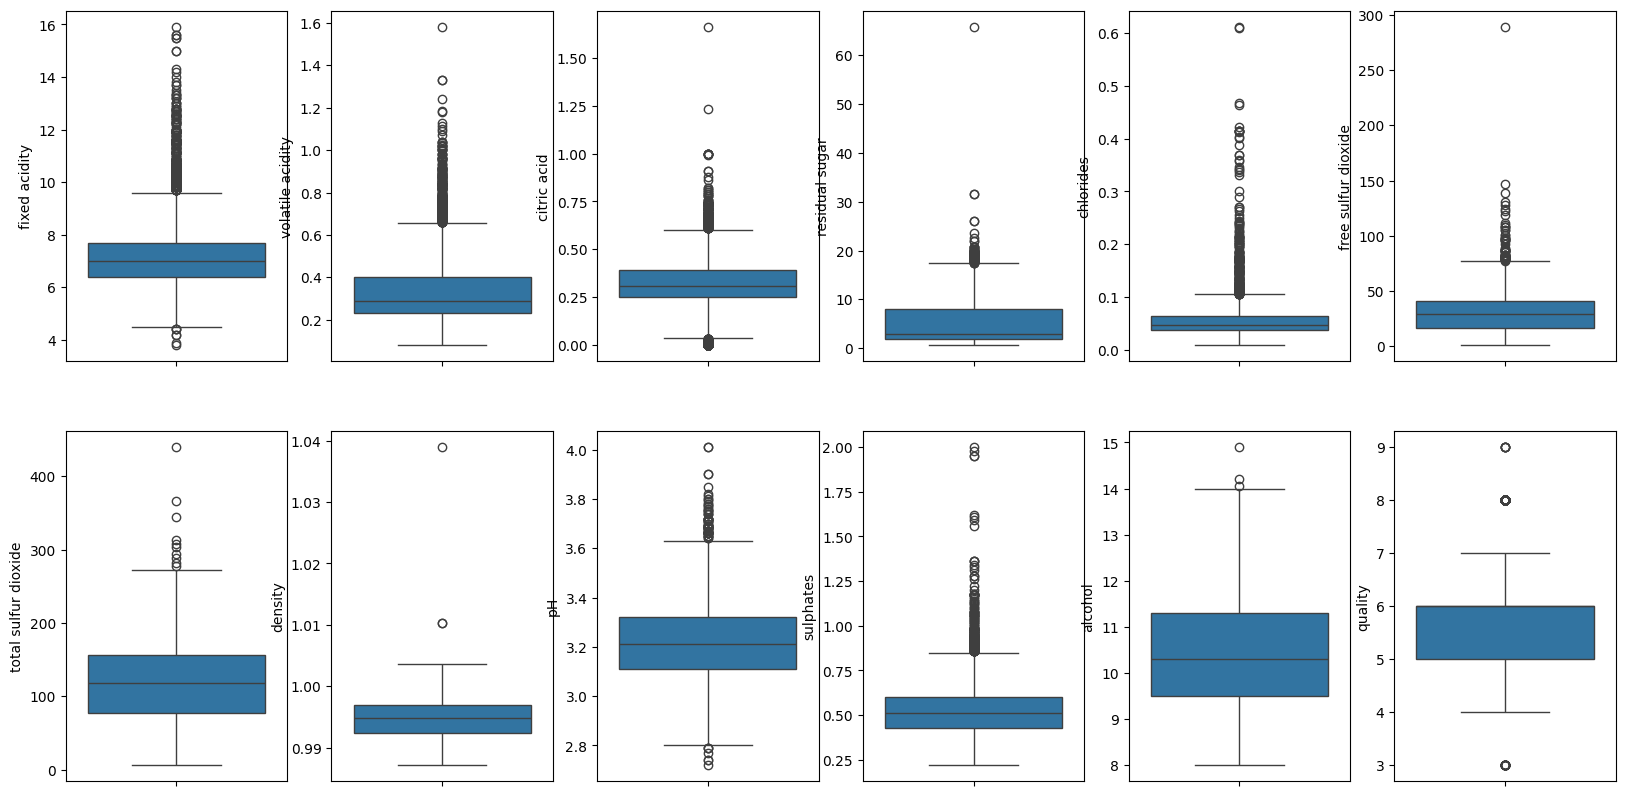

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in combined_notype_df.items():
    if col != 'type':
        sns.boxplot(y=col, data=combined_notype_df, ax=ax[index])
        index += 1
plt

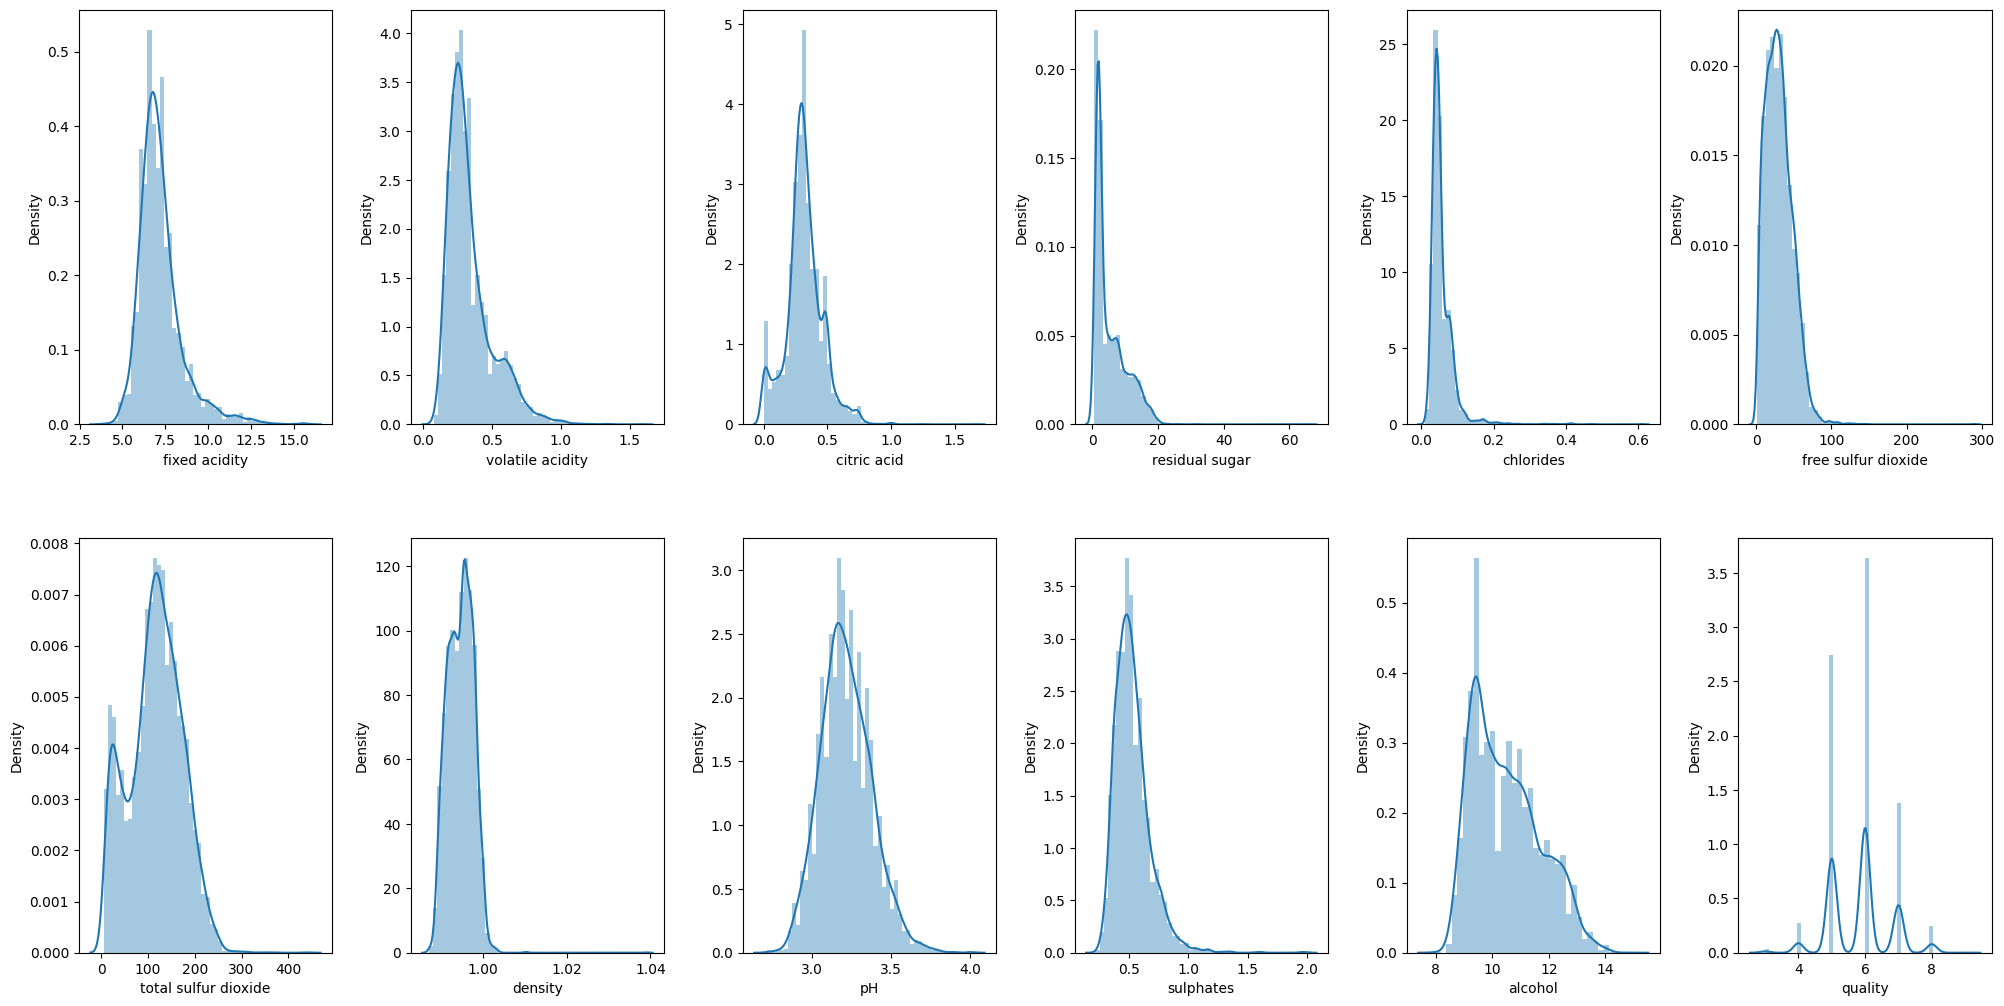

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in combined_notype_df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Logarithm transformation to help making the highly skewed distribution to less skewed.

Text(0, 0.5, '')

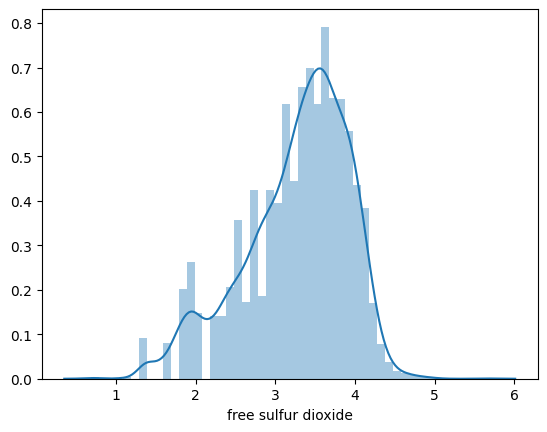

In [ ]:
target_value = "free sulfur dioxide"


combined_notype_df[target_value] = np.log(1 + combined_notype_df[target_value])
sns.distplot(combined_notype_df[target_value])
plt.ylabel(None)

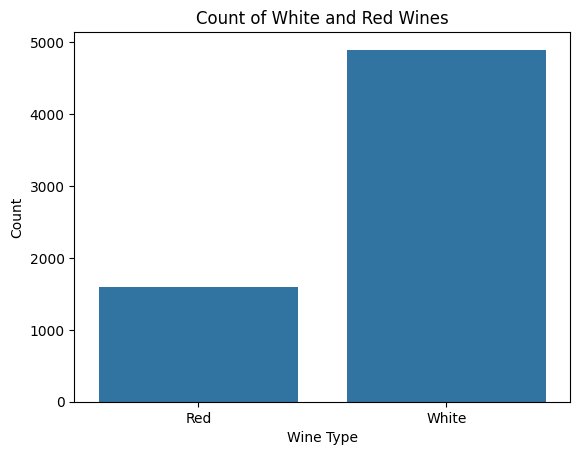

In [ ]:
sns.countplot(x='White', data=combined_df)

plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.title('Count of White and Red Wines')
plt.xticks(ticks=[0, 1], labels=['Red', 'White'])  # False is Red and True is White

plt.show()

<Axes: xlabel='quality', ylabel='count'>

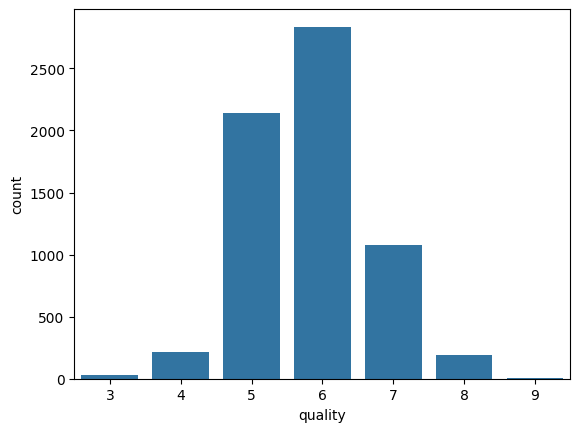

In [ ]:
sns.countplot(x="quality", data=combined_df)

## Correlations

In [ ]:
correlation_matrix = combined_notype_df.corr()
correlation_with_target = correlation_matrix['quality']

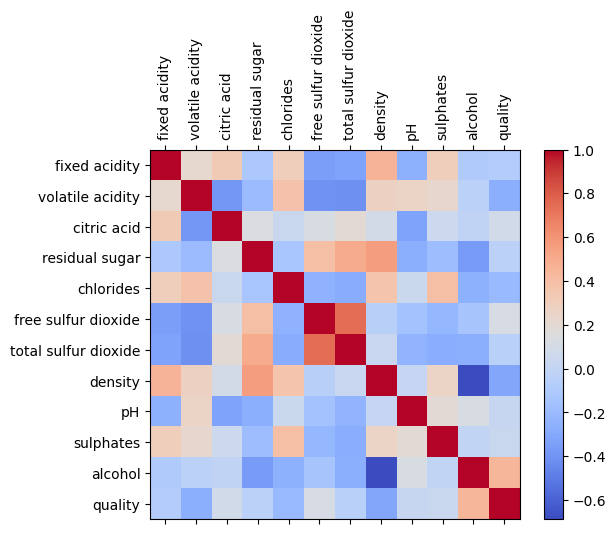

In [ ]:
fig, ax = plt.subplots()
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Setting axis labels to column names from the DataFrame
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)  # Rotate for better readability
ax.set_yticks(range(len(correlation_matrix.index)))
ax.set_yticklabels(correlation_matrix.index)

plt.show()

In [ ]:
print(correlation_with_target)

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.112191
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64


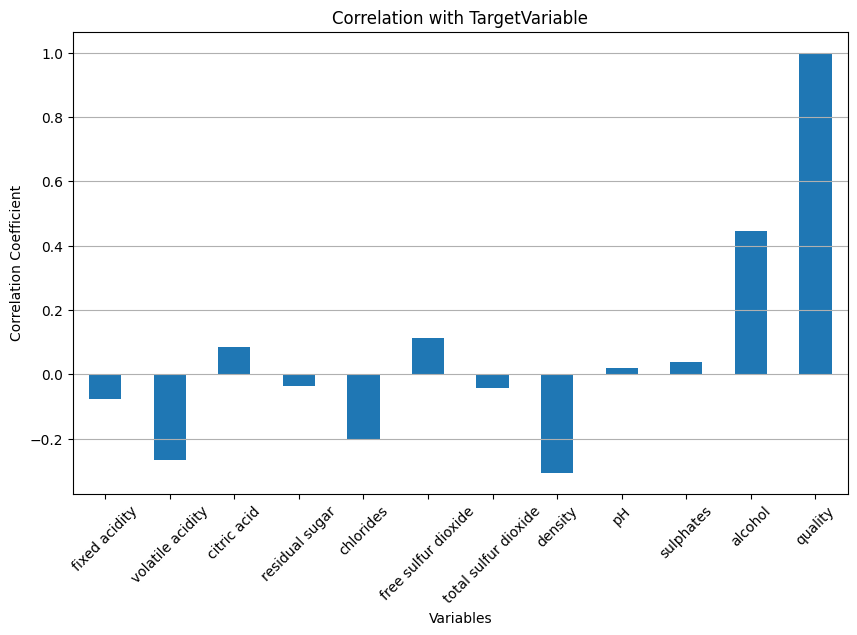

In [ ]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
correlation_with_target.plot(kind='bar')
plt.title('Correlation with TargetVariable')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.grid(axis='y')
plt.show()

# Machine Learning

## Preparing the data

### Splitting (IN/OUT)

Splitting the dataset in an input and an output. For the input the type and the quality will be deleted. For the output we just keep the quality.

In [ ]:
white_df = combined_df[combined_df["White"]==True]
red_df = combined_df[combined_df["White"]==False]

In [ ]:
display(red_df)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4898            7.4             0.700         0.00             1.9      0.076   
4899            7.8             0.880         0.00             2.6      0.098   
4900            7.8             0.760         0.04             2.3      0.092   
4901           11.2             0.280         0.56             1.9      0.075   
4902            7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4898                 11.0                  34.0  0.99780  3.51       0.56   
4899                 25.0                  67.0  0.99680  3.20       0.68   
4900                 15.0                  54.0  0.99700  3.26       0.65   
4901                 17.0                  60.0  0.99800  3.16       0.58   
4902                 11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  White  
4898      9.4        5  False  
4899      9.8        5  False  
4900      9.8        5  False  
4901      9.8        6  False  
4902      9.4        5  False  
...       ...      ...    ...  
6492     10.5        5  False  
6493     11.2        6  False  
6494     11.0        6  False  
6495     10.2        5  False  
6496     11.0        6  False  

[1599 rows x 13 columns]

In [ ]:
all_input = combined_df.drop(columns=["White", "quality"])
all_output = combined_df["quality"]

white_input = white_df.drop(columns=["White", "quality"])
white_output = white_df["quality"]

red_input = red_df.drop(columns=["White", "quality"])
red_output = red_df["quality"]

In [ ]:
all_output.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### Oversampling

We have a class inbalance so we need to generate new features for the minority classes

In [ ]:
oversampling = False

In [ ]:
'''from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=4)
# transform the dataset
over_all_input, over_all_output = oversample.fit_resample(all_input, all_output)
over_white_input, over_white_output = oversample.fit_resample(white_input, white_output)
over_red_input, over_red_output = oversample.fit_resample(red_input, red_output)

over_all_output.value_counts()'''

'from imblearn.over_sampling import SMOTE\n\noversample = SMOTE(k_neighbors=4)\n# transform the dataset\nover_all_input, over_all_output = oversample.fit_resample(all_input, all_output)\nover_white_input, over_white_output = oversample.fit_resample(white_input, white_output)\nover_red_input, over_red_output = oversample.fit_resample(red_input, red_output)\n\nover_all_output.value_counts()'

### Stratify train and test subsets

Because of class imbalance, we stratify our train and test subsets splits so that the distribution of the classes is preserved. Please note that the option of stratification was only tested with the original (not oversampled) dataset.

In [ ]:
stratification = False

### Choose Model Values

In [ ]:
input = all_input
output = all_output

output.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

# Training the model

We use classification or regressor to train the model.


## Classification

Creating a classification function which also evaluates the accuracy.

In [ ]:
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def custom_metrics(output_test, output_pred, adjacent_range=1):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    total = len(output_test)

    for true_val, pred_val in zip(output_test, output_pred):
        if abs(true_val - pred_val) <= adjacent_range:
            true_positives += 1
        else:
            if pred_val not in output_test:
                false_positives += 1
            if true_val not in output_pred:
                false_negatives += 1

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = true_positives / total

    return precision, recall, f1, accuracy

def classify(model, input, output, adjacent_range=1):
    input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.25, random_state=42)

    # Train the model
    model.fit(input_train, output_train)

    # Predict labels on the test set
    output_pred = model.predict(input_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(output_test, output_pred)

    model_name = str(model).split("(")[0]
    print(model_name)
    print("------------------------------")

    # Overall accuracy
    accuracy = accuracy_score(output_test, output_pred)
    print("Accuracy:", accuracy)

    # Cross-validation
    #score = cross_val_score(model, input_test, output_test, cv=5)
    #print("CV Score:", np.mean(score))  # np.mean() gives us the average value of 5 scores

    # Precision, recall, and F1 score (weighted)
    precision = precision_score(output_test, output_pred, average="weighted")
    recall = recall_score(output_test, output_pred, average="weighted")
    f1 = f1_score(output_test, output_pred, average="weighted")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    print("------------------------------")

    # Custom precision, recall, F1 score, and accuracy considering adjacent classes
    custom_precision, custom_recall, custom_f1, custom_accuracy = custom_metrics(output_test, output_pred, adjacent_range)
    print(f"Adjacented Accuracy (Range: {adjacent_range}): {custom_accuracy}")
    print(f"Adjacented Precision (Range {adjacent_range}): {custom_precision}")
    print(f"Adjacented Recall (Range {adjacent_range}): {custom_recall}")
    print(f"Adjacented F1 Score (Range {adjacent_range}): {custom_f1}")

    print("------------------------------")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(output_test), yticklabels=np.unique(output_test))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    """

'\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.model_selection import cross_val_score, train_test_split\nfrom sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score\n\ndef custom_metrics(output_test, output_pred, adjacent_range=1):\n    true_positives = 0\n    false_positives = 0\n    false_negatives = 0\n    total = len(output_test)\n\n    for true_val, pred_val in zip(output_test, output_pred):\n        if abs(true_val - pred_val) <= adjacent_range:\n            true_positives += 1\n        else:\n            if pred_val not in output_test:\n                false_positives += 1\n            if true_val not in output_pred:\n                false_negatives += 1\n\n    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0\n    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0\n    f1 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

def custom_metrics(output_test, output_pred, adjacent_range=1):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    total = len(output_test)

    for true_val, pred_val in zip(output_test, output_pred):
        if abs(true_val - pred_val) <= adjacent_range:
            true_positives += 1
        else:
            if pred_val not in output_test:
                false_positives += 1
            if true_val not in output_pred:
                false_negatives += 1

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = true_positives / total

    return precision, recall, f1, accuracy

def classify(model, input, output, oversample, stratify):
    adjacent_range=1
    if stratify:
          input_train, input_test, output_train, output_test = train_test_split(input, output, stratify=output, test_size=0.25, random_state=42)
    else:
          input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.25, random_state=42)

    if oversample:
        # Apply SMOTE to the training data
        smote = SMOTE(k_neighbors=4)
        input_train, output_train = smote.fit_resample(input_train, output_train)

    # Train the model
    model.fit(input_train, output_train)

    # Predict labels on the test set
    output_pred = model.predict(input_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(output_test, output_pred)

    model_name = str(model).split("(")[0]
    print(model_name)
    print("------------------------------")

    # Overall accuracy
    accuracy = accuracy_score(output_test, output_pred)
    print("Overall Accuracy:", accuracy)

    # Precision, recall, and F1 score (weighted)
    precision = precision_score(output_test, output_pred, average="weighted")
    recall = recall_score(output_test, output_pred, average="weighted")
    f1 = f1_score(output_test, output_pred, average="weighted")
    print("Weighted Precision:", precision)
    print("Weighted Recall:", recall)
    print("Weighted F1 Score:", f1)

    print("------------------------------")

    # Custom precision, recall, F1 score, and accuracy considering adjacent classes
    custom_precision, custom_recall, custom_f1, custom_accuracy = custom_metrics(output_test, output_pred, adjacent_range)
    print(f"Adjacented Accuracy (Range: {adjacent_range}): {custom_accuracy}")
    print(f"Adjacented Precision (Range {adjacent_range}): {custom_precision}")
    print(f"Adjacented Recall (Range {adjacent_range}): {custom_recall}")
    print(f"Adjacented F1 Score (Range {adjacent_range}): {custom_f1}")

    print("------------------------------")

    # Classification report for per-class metrics
    class_report = classification_report(output_test, output_pred, output_dict=True)
    print("Per-Class Evaluation:")
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            print(f"Class {label}:")
            print(f"  Precision: {metrics['precision']:.4f}")
            print(f"  Recall: {metrics['recall']:.4f}")
            print(f"  F1 Score: {metrics['f1-score']:.4f}")
            print(f"  Support: {metrics['support']}")

    print("------------------------------")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(output_test), yticklabels=np.unique(output_test))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### Logistic Regression

Good for baseline models due to its simplicity and efficiency

LogisticRegression
------------------------------
Overall Accuracy: 0.47323076923076923
Weighted Precision: 0.4152166152477517
Weighted Recall: 0.47323076923076923
Weighted F1 Score: 0.4086813885010598
------------------------------
Adjacented Accuracy (Range: 1): 0.9341538461538461
Adjacented Precision (Range 1): 0.9341538461538461
Adjacented Recall (Range 1): 0.9523212045169385
Adjacented F1 Score (Range 1): 0.9431500465983225
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 53
Class 5:
  Precision: 0.4787
  Recall: 0.4286
  F1 Score: 0.4523
  Support: 525
Class 6:
  Precision: 0.4721
  Recall: 0.7384
  F1 Score: 0.5760
  Support: 734
Class 7:
  Precision: 0.2857
  Recall: 0.0074
  F1 Score: 0.0145
  Support: 269
Class 8:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 39
Class macro avg:
  Precision: 0.2061
 

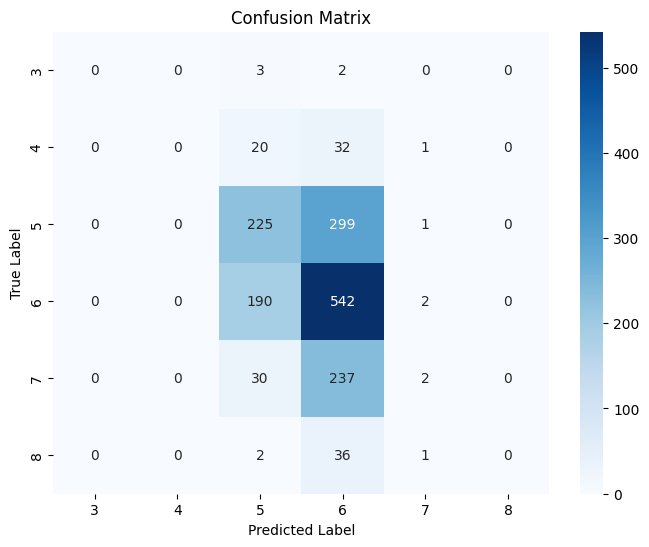

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, input, output, oversampling, stratification)

### Decision Tree

Easy to interpret and capable of capturing non-linear patterns.

DecisionTreeClassifier
------------------------------
Overall Accuracy: 0.5612307692307692
Weighted Precision: 0.5529307614314901
Weighted Recall: 0.5612307692307692
Weighted F1 Score: 0.5545285943800474
------------------------------
Adjacented Accuracy (Range: 1): 0.9403076923076923
Adjacented Precision (Range 1): 0.9437924644842496
Adjacented Recall (Range 1): 1.0
Adjacented F1 Score (Range 1): 0.971083571655545
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.1923
  Recall: 0.0943
  F1 Score: 0.1266
  Support: 53
Class 5:
  Precision: 0.6415
  Recall: 0.6000
  F1 Score: 0.6201
  Support: 525
Class 6:
  Precision: 0.5665
  Recall: 0.6444
  F1 Score: 0.6029
  Support: 734
Class 7:
  Precision: 0.4631
  Recall: 0.4201
  F1 Score: 0.4405
  Support: 269
Class 8:
  Precision: 0.2857
  Recall: 0.1538
  F1 Score: 0.2000
  Support: 39
Class macro avg:
  Precision: 0.3582
  Recall: 0.318

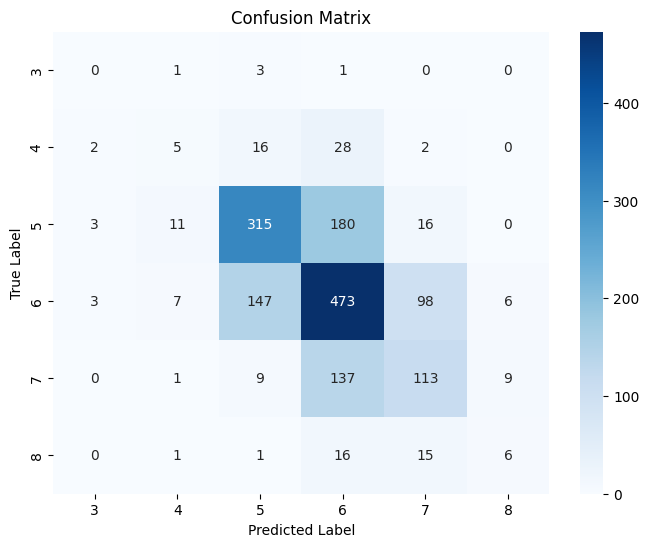

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#pruning
#max_depth = 10

dtree = DecisionTreeClassifier(max_depth = 10)
classify(dtree, input, output, oversampling, stratification)

#### Visualization - Decision Tree

In [ ]:
import pickle

# Saves file (serialized dtree object)
# wb stands for Write Binary
pickle.dump(dtree, open('dtree_wine.pkl', 'wb'))

In [ ]:
# Just showing the file was actually created
!ls | grep pkl

dtree_wine.pkl


In [ ]:
import pydotplus
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [ ]:
dot_data = StringIO()
export_graphviz(dtree,
                out_file=dot_data,
                #feature_names=iris.feature_names,
                #class_names=iris.target_names,
                filled=True,
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.515504 to fit



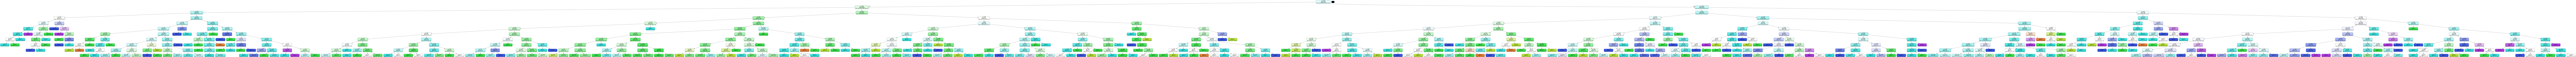

In [ ]:
Image(graph.create_png())
#ATTENTION: Needs a lot of time

### Random Forest

An ensemble method that can handle overfitting better than decision trees and can be very effective.

RandomForestClassifier
------------------------------
Overall Accuracy: 0.6843076923076923
Weighted Precision: 0.685383329082354
Weighted Recall: 0.6843076923076923
Weighted F1 Score: 0.6704127461435015
------------------------------
Adjacented Accuracy (Range: 1): 0.9716923076923077
Adjacented Precision (Range 1): 0.9722906403940886
Adjacented Recall (Range 1): 0.9968434343434344
Adjacented F1 Score (Range 1): 0.9844139650872819
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.6667
  Recall: 0.1132
  F1 Score: 0.1935
  Support: 53
Class 5:
  Precision: 0.7130
  Recall: 0.7429
  F1 Score: 0.7276
  Support: 525
Class 6:
  Precision: 0.6643
  Recall: 0.7793
  F1 Score: 0.7172
  Support: 734
Class 7:
  Precision: 0.6821
  Recall: 0.4944
  F1 Score: 0.5733
  Support: 269
Class 8:
  Precision: 0.8462
  Recall: 0.2821
  F1 Score: 0.4231
  Support: 39
Class macro avg:
  Precision: 0.5954


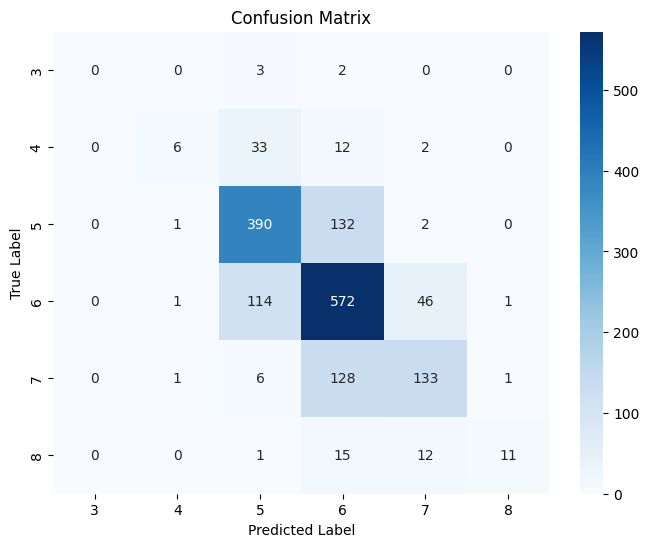

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model, input, output, oversampling, stratification)

### Extra Trees

ExtraTreesClassifier
------------------------------
Overall Accuracy: 0.6873846153846154
Weighted Precision: 0.693078870308581
Weighted Recall: 0.6873846153846154
Weighted F1 Score: 0.6761370855001414
------------------------------
Adjacented Accuracy (Range: 1): 0.9716923076923077
Adjacented Precision (Range 1): 0.9716923076923077
Adjacented Recall (Range 1): 0.9968434343434344
Adjacented F1 Score (Range 1): 0.9841071985042069
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.7692
  Recall: 0.1887
  F1 Score: 0.3030
  Support: 53
Class 5:
  Precision: 0.7050
  Recall: 0.7238
  F1 Score: 0.7143
  Support: 525
Class 6:
  Precision: 0.6640
  Recall: 0.7888
  F1 Score: 0.7210
  Support: 734
Class 7:
  Precision: 0.7297
  Recall: 0.5019
  F1 Score: 0.5947
  Support: 269
Class 8:
  Precision: 0.8125
  Recall: 0.3333
  F1 Score: 0.4727
  Support: 39
Class macro avg:
  Precision: 0.6134
  

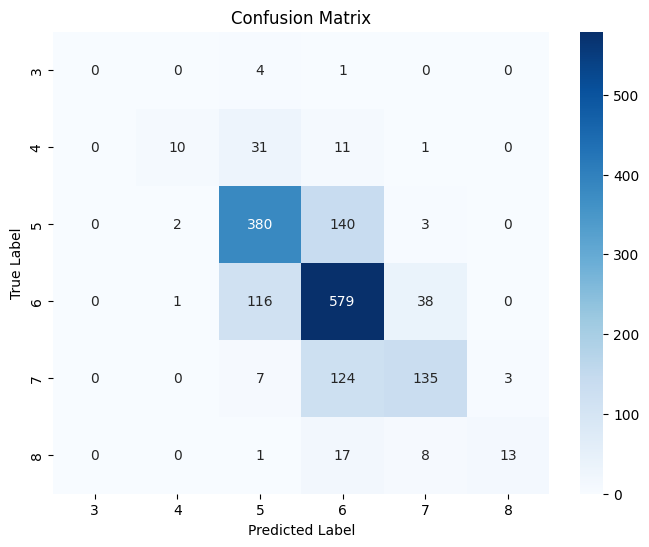

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model, input, output, oversampling, stratification)

### XGBoost

Gradient Boosting Machines (GBM), including implementations like XGBoost, LightGBM, and CatBoost: These are powerful algorithms that often perform very well on structured data like this.

XGBClassifier
------------------------------
Overall Accuracy: 0.6615384615384615
Weighted Precision: 0.6541191191184087
Weighted Recall: 0.6615384615384615
Weighted F1 Score: 0.6526026450200952
------------------------------
Adjacented Accuracy (Range: 1): 0.9655384615384616
Adjacented Precision (Range 1): 1.0
Adjacented Recall (Range 1): 1.0
Adjacented F1 Score (Range 1): 1.0
------------------------------
Per-Class Evaluation:
Class 0:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 1:
  Precision: 0.4211
  Recall: 0.1509
  F1 Score: 0.2222
  Support: 53
Class 2:
  Precision: 0.6775
  Recall: 0.7162
  F1 Score: 0.6963
  Support: 525
Class 3:
  Precision: 0.6613
  Recall: 0.7343
  F1 Score: 0.6959
  Support: 734
Class 4:
  Precision: 0.6571
  Recall: 0.5130
  F1 Score: 0.5762
  Support: 269
Class 5:
  Precision: 0.5833
  Recall: 0.3590
  F1 Score: 0.4444
  Support: 39
Class macro avg:
  Precision: 0.5001
  Recall: 0.4122
  F1 Score: 0.4392
  Support: 1625
C

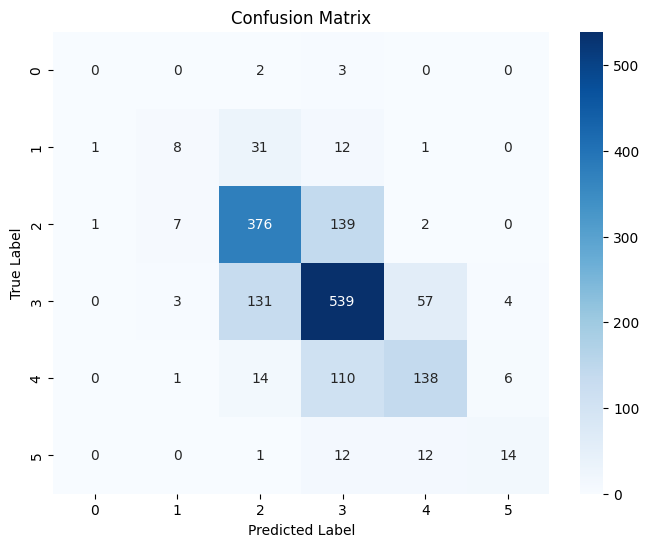

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Assuming 'output' is your target variable with quality scores from 3 to 9
label_encoder = LabelEncoder()
encoded_output = label_encoder.fit_transform(output)

model = xgb.XGBClassifier(use_label_encoder=False)
classify(model, input, encoded_output, oversampling, stratification)

### Support Vector Machine

Support Vector Machines (SVM): Effective in high-dimensional spaces and with different kernel functions, it can capture complex relationships.

In [ ]:
'''from sklearn.svm import SVC

model = SVC(kernel='linear')
classify(model, input, output, oversampling)

#ATTENTION: Needs a lot of time'''

"from sklearn.svm import SVC\n\nmodel = SVC(kernel='linear')\nclassify(model, input, output, oversampling)\n\n#ATTENTION: Needs a lot of time"

### K-Nearest Neighbors (KNN)

Support Vector Machines (SVM): Effective in high-dimensional spaces and with different kernel functions, it can capture complex relationships.

KNeighborsClassifier
------------------------------
Overall Accuracy: 0.47507692307692306
Weighted Precision: 0.45670603101471946
Weighted Recall: 0.47507692307692306
Weighted F1 Score: 0.4614334012437956
------------------------------
Adjacented Accuracy (Range: 1): 0.9070769230769231
Adjacented Precision (Range 1): 0.9098765432098765
Adjacented Recall (Range 1): 0.9966193373901284
Adjacented F1 Score (Range 1): 0.9512746047111972
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.1053
  Recall: 0.0377
  F1 Score: 0.0556
  Support: 53
Class 5:
  Precision: 0.4538
  Recall: 0.5524
  F1 Score: 0.4983
  Support: 525
Class 6:
  Precision: 0.5222
  Recall: 0.5450
  F1 Score: 0.5333
  Support: 734
Class 7:
  Precision: 0.4115
  Recall: 0.2937
  F1 Score: 0.3427
  Support: 269
Class 8:
  Precision: 0.1111
  Recall: 0.0256
  F1 Score: 0.0417
  Support: 39
Class macro avg:
  Precision: 0.267

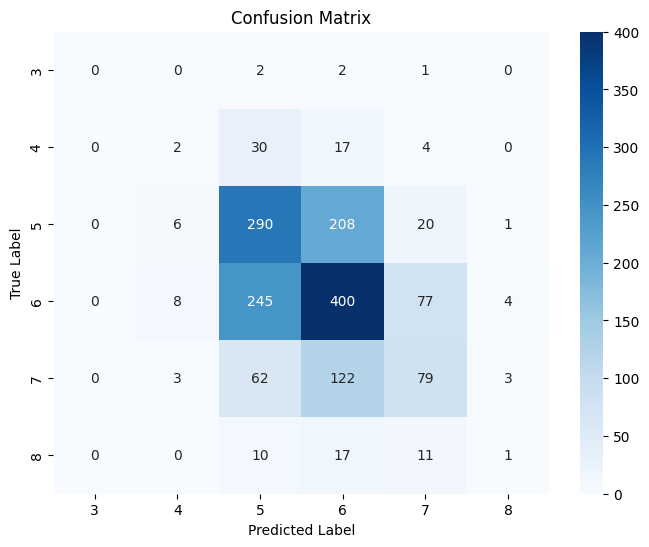

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
classify(model, input, output, oversampling, stratification)

### Neural Network


Neural Networks: With sufficient data, neural networks can capture complex patterns and interactions, though they may require more tuning and computational resources.

MLPClassifier
------------------------------
Overall Accuracy: 0.544
Weighted Precision: 0.5093948084107074
Weighted Recall: 0.544
Weighted F1 Score: 0.49187569572430845
------------------------------
Adjacented Accuracy (Range: 1): 0.9544615384615385
Adjacented Precision (Range 1): 0.9544615384615385
Adjacented Recall (Range 1): 0.9754716981132076
Adjacented F1 Score (Range 1): 0.9648522550544323
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 53
Class 5:
  Precision: 0.5945
  Recall: 0.5390
  F1 Score: 0.5654
  Support: 525
Class 6:
  Precision: 0.5269
  Recall: 0.7875
  F1 Score: 0.6313
  Support: 734
Class 7:
  Precision: 0.4792
  Recall: 0.0855
  F1 Score: 0.1451
  Support: 269
Class 8:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 39
Class macro avg:
  Precision: 0.2668
  Recall: 0.2353
  F1 Score: 0.22

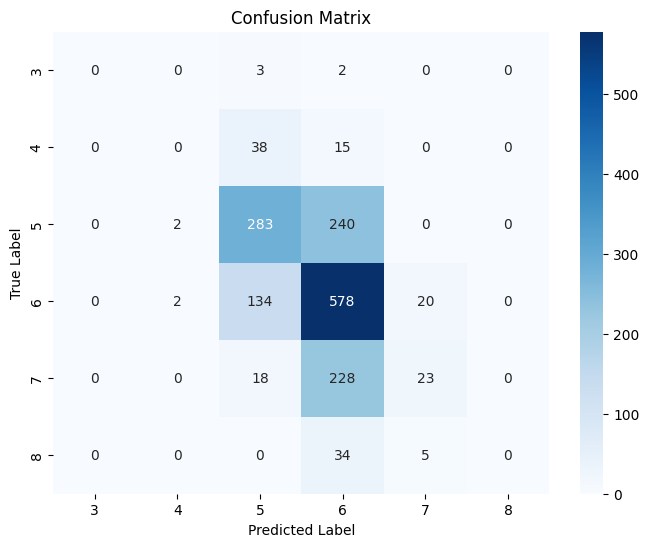

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
classify(model, input, output, oversampling, stratification)

## Regression

In [ ]:
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import time

def regress(model, input, output, oversampling):
    input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.25, random_state=42)

    if oversample:
        # Apply SMOTE to the training data
        smote = SMOTE(k_neighbors=4)
        input_train, output_train = smote.fit_resample(input_train, output_train)

    # Train the model
    model.fit(input_train, output_train)

    # Start timer
    start_time = time.time()

    # Make predictions
    output_pred = model.predict(input_test)

    # End timer
    end_time = time.time()  # Record the end time
    pred_time = end_time - start_time  # Calculate the prediction time

    # Evaluate the model
    mse = mean_squared_error(output_test, output_pred)
    r2 = r2_score(output_test, output_pred)

    model_name = str(model).split("(")[0]
    print(model_name)
    print("------------------------------")

    # R-Square
    print("R-squared (Accuracy):", r2)

    # Mean Square Error
    print("MSE:", mse)

    # RMSE
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)

    # Print time
    print("Prediction Time:", pred_time, "seconds")  # Print the prediction time



    # ROUNDING AND CLASSIFICATION METRICS
    # Round predicted values to the nearest integer
    output_pred_rounded = np.round(output_pred).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(output_test, output_pred_rounded)

    # Calculate classification metrics
    accuracy = accuracy_score(output_test, output_pred_rounded)
    precision = precision_score(output_test, output_pred_rounded, average='weighted')
    recall = recall_score(output_test, output_pred_rounded, average='weighted')
    f1 = f1_score(output_test, output_pred_rounded, average='weighted')

    print("------------------------------")

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(output_test), yticklabels=np.unique(output_test))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("------------------------------")

    # SCATTERPLOT
    # Actual vs. Predicted Plot
    plt.figure(figsize=(8, 8))
    plt.scatter(output_test, output_pred)
    plt.yticks(np.arange(0, 10, 1))
    plt.plot([min(output_test), max(output_test)], [min(output_test), max(output_test)], '--', color='red')
    plt.title("Actual vs. Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # BOXPLOT
    # Combine true and predicted values into a single array
    combined_values = np.column_stack((output_test, output_pred))

    # Group predicted values based on true values
    grouped_values = {}
    for true_value, pred_value in combined_values:
        if true_value not in grouped_values:
            grouped_values[true_value] = []
        grouped_values[true_value].append(pred_value)

    # Sort the grouped values by the keys (true values)
    sorted_grouped_values = {k: v for k, v in sorted(grouped_values.items())}

    # Create a box plot for each group
    plt.figure(figsize=(8, 8))
    plt.boxplot(sorted_grouped_values.values(), labels=sorted_grouped_values.keys())

    plt.yticks(np.arange(0, 10, 1))
    plt.title("Box Plot of Predicted Values by True Values")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()
  """

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 116)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import time

def custom_metrics(output_test, output_pred, adjacent_range=1):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    total = len(output_test)

    for true_val, pred_val in zip(output_test, output_pred):
        if abs(true_val - pred_val) <= adjacent_range:
            true_positives += 1
        else:
            if pred_val not in output_test:
                false_positives += 1
            if true_val not in output_pred:
                false_negatives += 1

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = true_positives / total

    return precision, recall, f1, accuracy

def regress(model, input, output, oversample, stratify, adjacent_range=1):
    if stratify:
        input_train, input_test, output_train, output_test = train_test_split(input, output, stratify=output, test_size=0.25, random_state=42)
    else:
        input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.25, random_state=42)

    if oversample:
        # Apply SMOTE to the training data
        smote = SMOTE(k_neighbors=4)
        input_train, output_train = smote.fit_resample(input_train, output_train)

    # Train the model
    model.fit(input_train, output_train)


    # Make predictions
    output_pred = model.predict(input_test)

    # Evaluate the model
    mse = mean_squared_error(output_test, output_pred)
    r2 = r2_score(output_test, output_pred)

    model_name = str(model).split("(")[0]
    print(model_name)


    # ROUNDING AND CLASSIFICATION METRICS
    # Round predicted values to the nearest integer
    output_pred_rounded = np.round(output_pred).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(output_test, output_pred_rounded)

    # Calculate classification metrics
    accuracy = accuracy_score(output_test, output_pred_rounded)
    precision = precision_score(output_test, output_pred_rounded, average='weighted')
    recall = recall_score(output_test, output_pred_rounded, average='weighted')
    f1 = f1_score(output_test, output_pred_rounded, average='weighted')

    print("------------------------------")
    print("Overall Accuracy:", accuracy)
    print("Weighted Precision:", precision)
    print("Weighted Recall:", recall)
    print("Weighted F1 Score:", f1)
    print("------------------------------")

    # Custom precision, recall, F1 score, and accuracy considering adjacent classes
    custom_precision, custom_recall, custom_f1, custom_accuracy = custom_metrics(output_test, output_pred_rounded, adjacent_range)
    print(f"Adjacented Accuracy (Range: {adjacent_range}): {custom_accuracy}")
    print(f"Adjacented Precision (Range {adjacent_range}): {custom_precision}")
    print(f"Adjacented Recall (Range {adjacent_range}): {custom_recall}")
    print(f"Adjacented F1 Score (Range {adjacent_range}): {custom_f1}")
    print("------------------------------")

    # Per-Class Evaluation
    class_report = classification_report(output_test, output_pred_rounded, output_dict=True)
    print("Per-Class Evaluation:")
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            print(f"Class {label}:")
            print(f"  Precision: {metrics['precision']:.4f}")
            print(f"  Recall: {metrics['recall']:.4f}")
            print(f"  F1 Score: {metrics['f1-score']:.4f}")
            print(f"  Support: {metrics['support']}")
    print("------------------------------")

    # R-Square
    print("R-squared (Accuracy):", r2)

    # Mean Square Error
    print("MSE:", mse)

    # RMSE
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)

    print("------------------------------")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(output_test), yticklabels=np.unique(output_test))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # SCATTERPLOT
    # Actual vs. Predicted Plot
    plt.figure(figsize=(8, 8))
    plt.scatter(output_test, output_pred)
    plt.yticks(np.arange(0, 10, 1))
    plt.plot([min(output_test), max(output_test)], [min(output_test), max(output_test)], '--', color='red')
    plt.title("Actual vs. Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # BOXPLOT
    # Combine true and predicted values into a single array
    combined_values = np.column_stack((output_test, output_pred))

    # Group predicted values based on true values
    grouped_values = {}
    for true_value, pred_value in combined_values:
        if true_value not in grouped_values:
            grouped_values[true_value] = []
        grouped_values[true_value].append(pred_value)

    # Sort the grouped values by the keys (true values)
    sorted_grouped_values = {k: v for k, v in sorted(grouped_values.items())}

    # Create a box plot for each group
    plt.figure(figsize=(8, 8))
    plt.boxplot(sorted_grouped_values.values(), labels=sorted_grouped_values.keys())

    plt.yticks(np.arange(0, 10, 1))
    plt.title("Box Plot of Predicted Values by True Values")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

### Linear Regression

LinearRegression
------------------------------
Overall Accuracy: 0.5446153846153846
Weighted Precision: 0.5276938260086568
Weighted Recall: 0.5446153846153846
Weighted F1 Score: 0.5070083796362733
------------------------------
Adjacented Accuracy (Range: 1): 0.9569230769230769
Adjacented Precision (Range 1): 0.9569230769230769
Adjacented Recall (Range 1): 0.980453972257251
Adjacented F1 Score (Range 1): 0.9685456244160696
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.5000
  Recall: 0.0189
  F1 Score: 0.0364
  Support: 53
Class 5:
  Precision: 0.6142
  Recall: 0.5124
  F1 Score: 0.5587
  Support: 525
Class 6:
  Precision: 0.5250
  Recall: 0.7711
  F1 Score: 0.6247
  Support: 734
Class 7:
  Precision: 0.4579
  Recall: 0.1822
  F1 Score: 0.2606
  Support: 269
Class 8:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 39
Class macro avg:
  Precision: 0.3495
  Reca

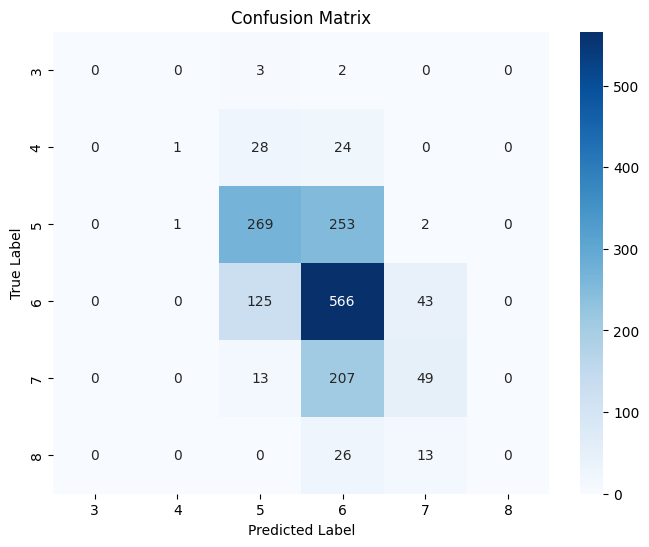

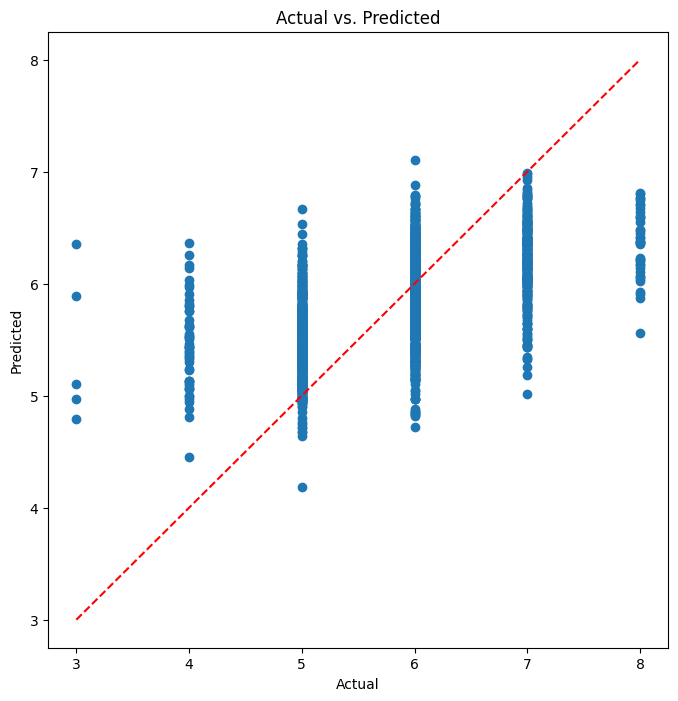

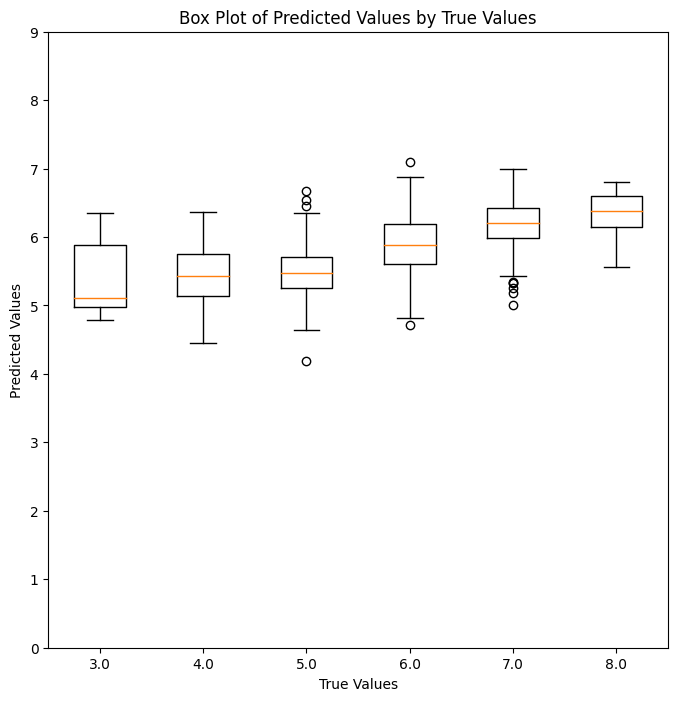

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
regress(model, input, output, oversampling, stratification)

### Random Forest Regression

RandomForestRegressor
------------------------------
Overall Accuracy: 0.6861538461538461
Weighted Precision: 0.6815474965315751
Weighted Recall: 0.6861538461538461
Weighted F1 Score: 0.668631757946472
------------------------------
Adjacented Accuracy (Range: 1): 0.9753846153846154
Adjacented Precision (Range 1): 0.9753846153846154
Adjacented Recall (Range 1): 0.9968553459119497
Adjacented F1 Score (Range 1): 0.9860031104199067
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.3333
  Recall: 0.0377
  F1 Score: 0.0678
  Support: 53
Class 5:
  Precision: 0.7154
  Recall: 0.7181
  F1 Score: 0.7167
  Support: 525
Class 6:
  Precision: 0.6693
  Recall: 0.7970
  F1 Score: 0.7276
  Support: 734
Class 7:
  Precision: 0.6840
  Recall: 0.5390
  F1 Score: 0.6029
  Support: 269
Class 8:
  Precision: 1.0000
  Recall: 0.1538
  F1 Score: 0.2667
  Support: 39
Class macro avg:
  Precision: 0.5670
 

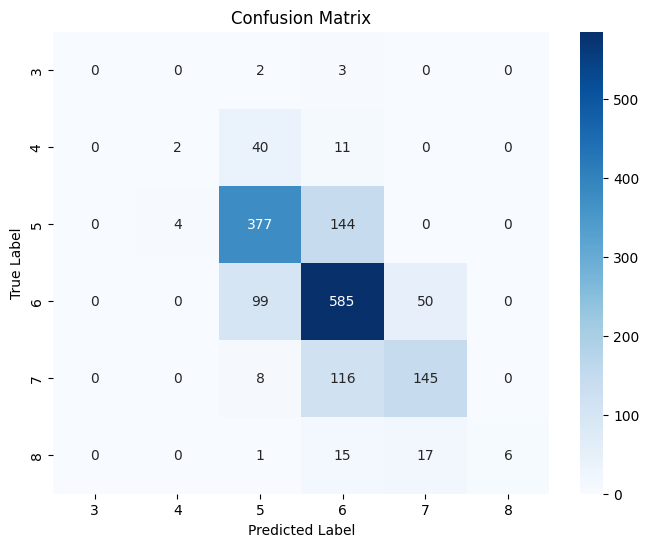

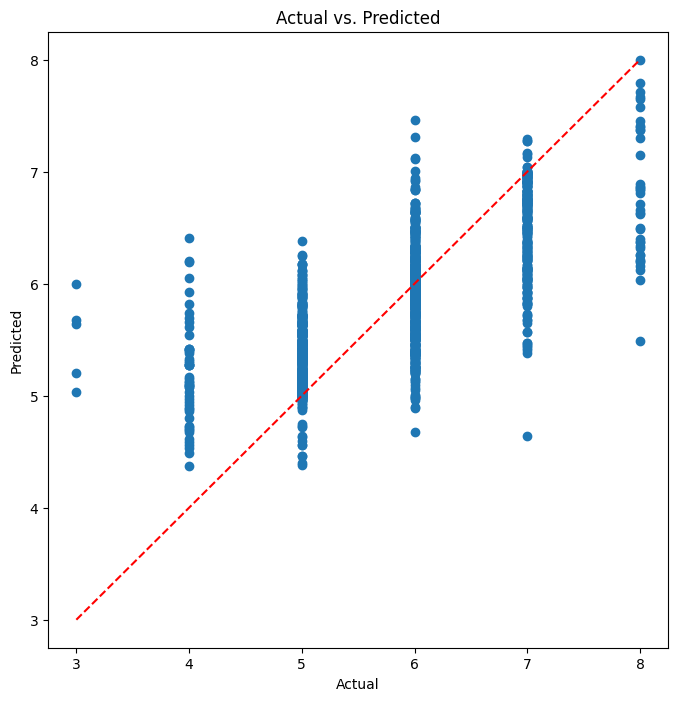

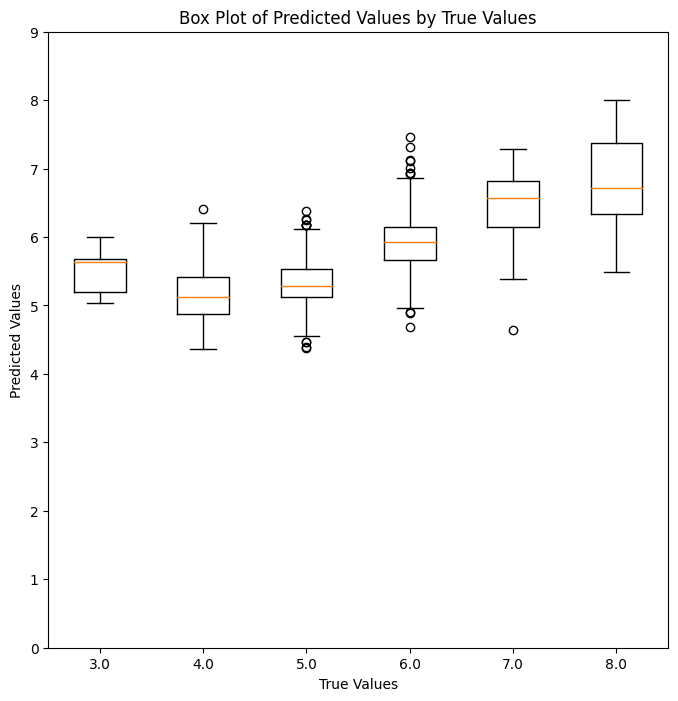

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#pruning: n_estimators=100 (how many trees), max_features='sqrt', min_samples_split=100 (how many samples we need for a split), min_samples_leaf=50 (how many samples at least a leaf need)

randforest = RandomForestRegressor()
regress(randforest, input, output, oversampling, stratification)

#### Trying to visualise it iclusive pruning

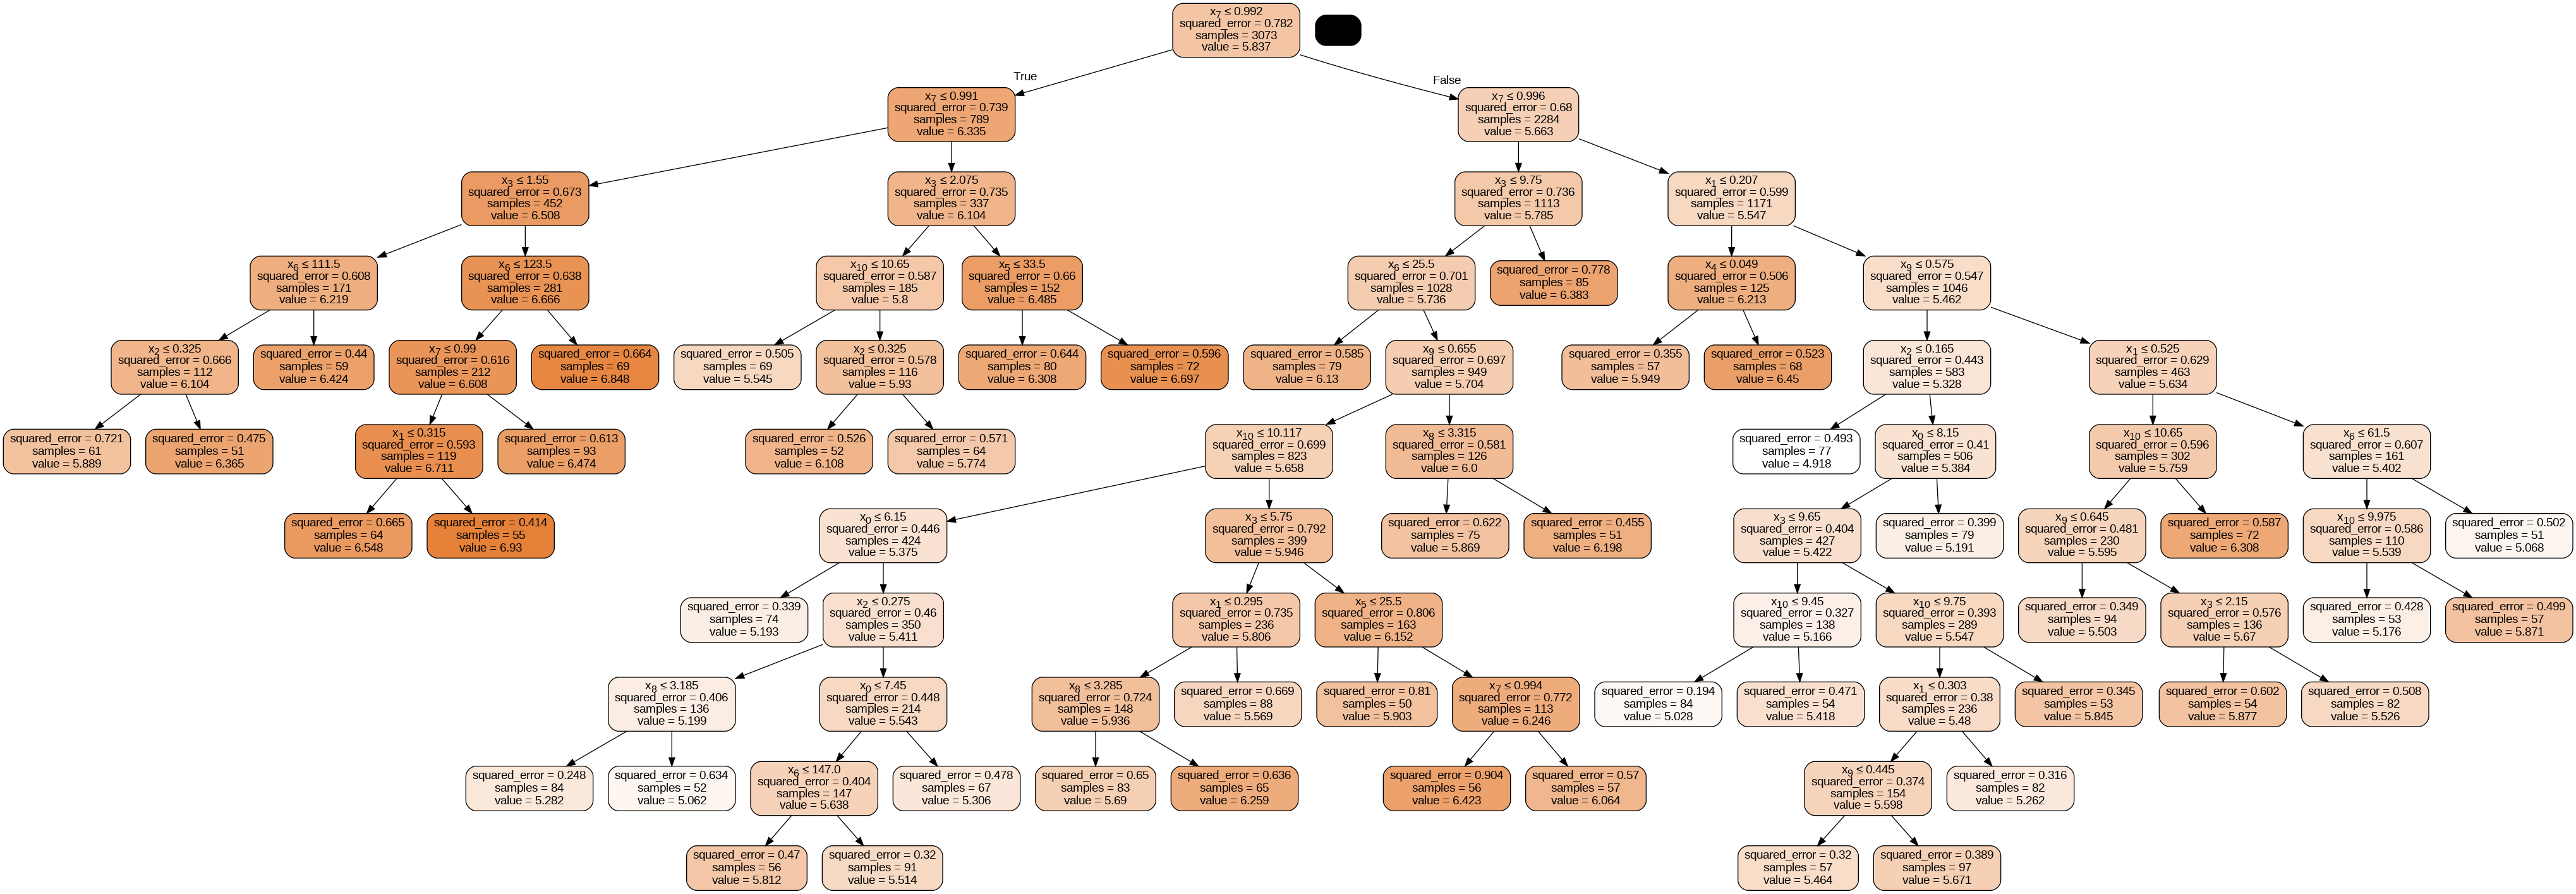

In [ ]:
import pickle

input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.25, random_state=42)

# Instantiate a Random Forest regressor
randforest = RandomForestRegressor(n_estimators=100, max_features='sqrt', min_samples_split=100, min_samples_leaf=50)

# Fit the Random Forest regressor to the data
randforest.fit(input_train, output_train)

# Save the trained Random Forest regressor using pickle
with open('randforest_wine.pkl', 'wb') as file:
    pickle.dump(randforest, file)

# Choose one of the trees from the forest
tree = randforest.estimators_[0]

# Export the decision tree to a Graphviz format
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                #feature_names=wine.feature_names,
                filled=True, rounded=True,
                special_characters=True)

# Visualize the decision tree
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Feature ranking:
1. feature alcohol (0.31908269496939556)
2. feature volatile acidity (0.14742562940080303)
3. feature density (0.14679743365489084)
4. feature chlorides (0.07543668322180977)
5. feature citric acid (0.06816649501668483)
6. feature free sulfur dioxide (0.0588830122293613)
7. feature sulphates (0.05268603784908135)
8. feature total sulfur dioxide (0.04579621405612175)
9. feature residual sugar (0.04228819199960181)
10. feature fixed acidity (0.021951287272860154)
11. feature pH (0.02148632032938959)


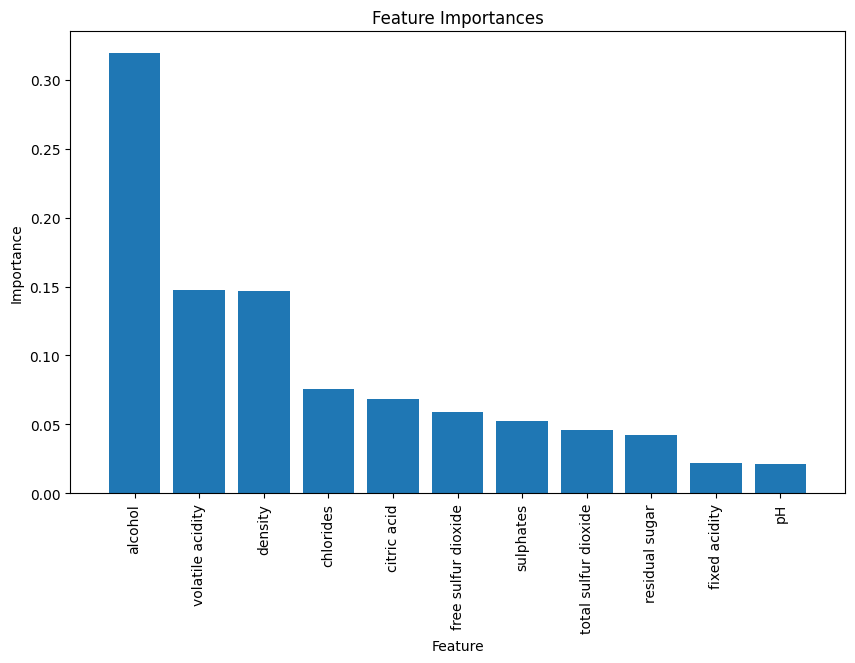

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# Assuming `input` and `output` are your dataset features and labels, and `input` is a DataFrame
# input = ...
# output = ...

# Get feature names from the DataFrame
feature_names = input.columns

# Split the data
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.25, random_state=42)

# Instantiate a Random Forest regressor
randforest = RandomForestRegressor(n_estimators=100, max_features='sqrt', min_samples_split=100, min_samples_leaf=50)

# Fit the Random Forest regressor to the data
randforest.fit(input_train, output_train)

# Save the trained Random Forest regressor using pickle
with open('randforest_wine.pkl', 'wb') as file:
    pickle.dump(randforest, file)

# Choose one of the trees from the forest
tree = randforest.estimators_[0]

# Export the decision tree to a Graphviz format
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                feature_names=feature_names,
                filled=True, rounded=True,
                special_characters=True)

# Visualize the decision tree
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Feature Importance Visualization
importances = randforest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(input_train.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(input_train.shape[1]), importances[indices], align="center")
plt.xticks(range(input_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, input_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

### Extra Tree Regressor

ExtraTreesRegressor
------------------------------
Overall Accuracy: 0.688
Weighted Precision: 0.6925962960169808
Weighted Recall: 0.688
Weighted F1 Score: 0.676196322600318
------------------------------
Adjacented Accuracy (Range: 1): 0.976
Adjacented Precision (Range 1): 0.976
Adjacented Recall (Range 1): 0.9968573224387178
Adjacented F1 Score (Range 1): 0.986318407960199
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.7000
  Recall: 0.1321
  F1 Score: 0.2222
  Support: 53
Class 5:
  Precision: 0.7119
  Recall: 0.7295
  F1 Score: 0.7206
  Support: 525
Class 6:
  Precision: 0.6686
  Recall: 0.7779
  F1 Score: 0.7191
  Support: 734
Class 7:
  Precision: 0.6872
  Recall: 0.5390
  F1 Score: 0.6042
  Support: 269
Class 8:
  Precision: 1.0000
  Recall: 0.3077
  F1 Score: 0.4706
  Support: 39
Class macro avg:
  Precision: 0.6280
  Recall: 0.4144
  F1 Score: 0.4561
  Support: 1625
Clas

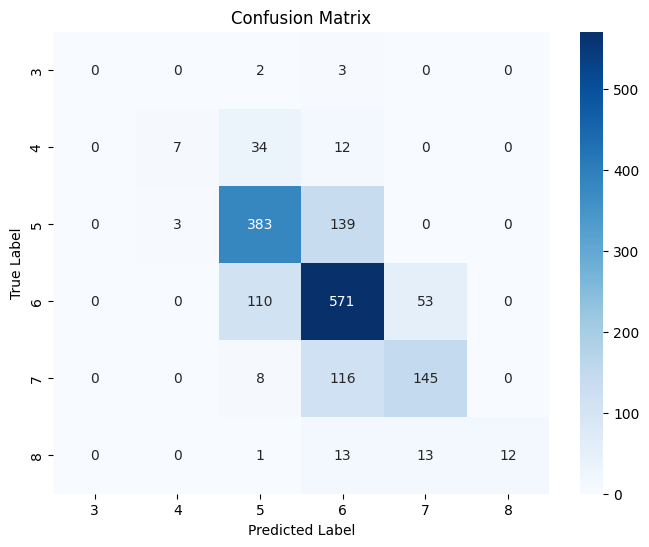

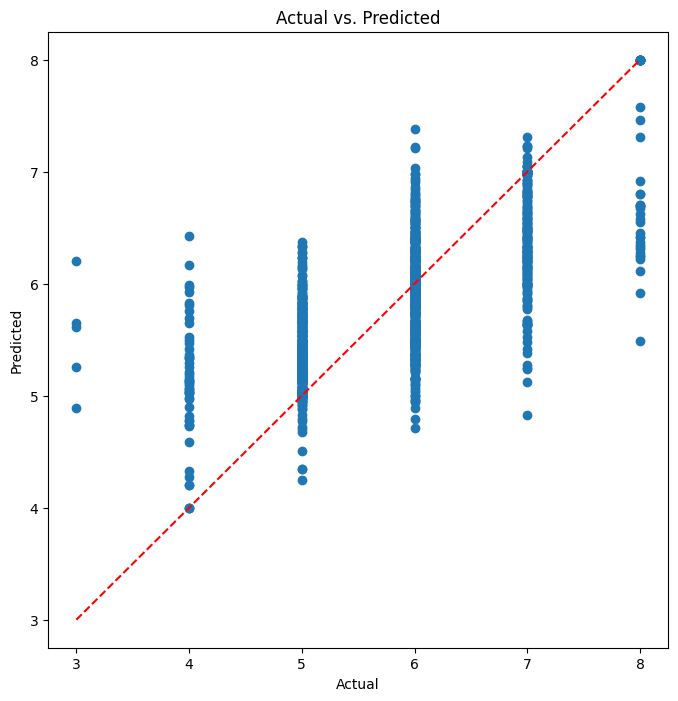

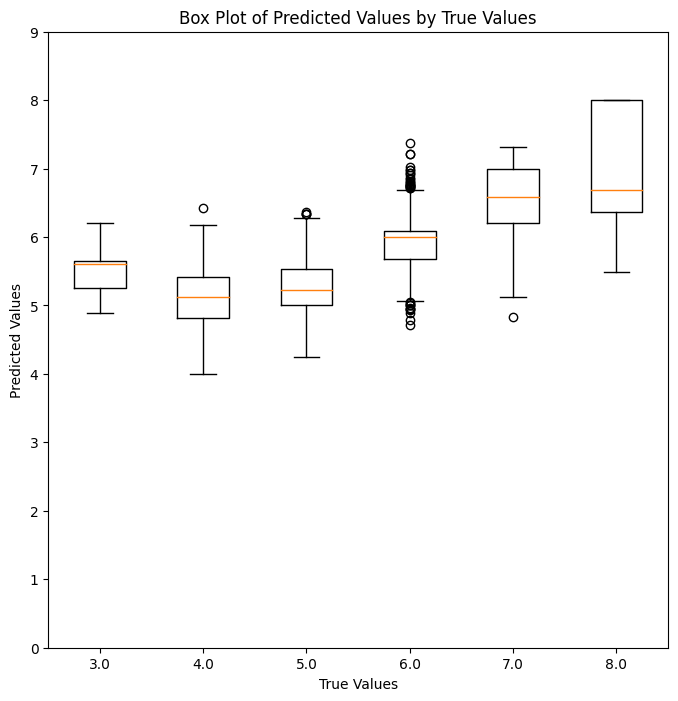

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(
    n_estimators=100,     # Increase number of trees
    max_depth=None,       # No limit on depth
    max_features=None
)
regress(model, input, output, oversampling, stratification)

### XG Boost Regression

XGBRegressor
------------------------------
Overall Accuracy: 0.64
Weighted Precision: 0.6298221779013354
Weighted Recall: 0.64
Weighted F1 Score: 0.6306444806359565
------------------------------
Adjacented Accuracy (Range: 1): 0.9772307692307692
Adjacented Precision (Range 1): 0.9784349969192853
Adjacented Recall (Range 1): 1.0
Adjacented F1 Score (Range 1): 0.9890999688570539
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.3182
  Recall: 0.1321
  F1 Score: 0.1867
  Support: 53
Class 5:
  Precision: 0.6612
  Recall: 0.6876
  F1 Score: 0.6741
  Support: 525
Class 6:
  Precision: 0.6465
  Recall: 0.7125
  F1 Score: 0.6779
  Support: 734
Class 7:
  Precision: 0.6061
  Recall: 0.5204
  F1 Score: 0.5600
  Support: 269
Class 8:
  Precision: 0.5625
  Recall: 0.2308
  F1 Score: 0.3273
  Support: 39
Class macro avg:
  Precision: 0.4657
  Recall: 0.3806
  F1 Score: 0.4043
  Support: 1625


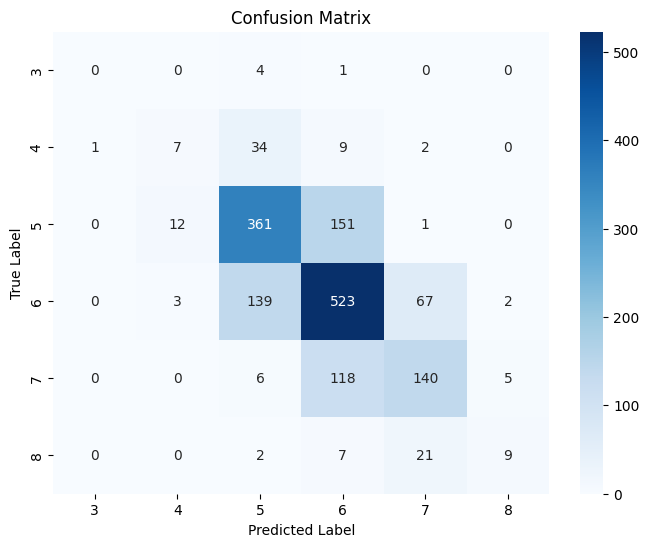

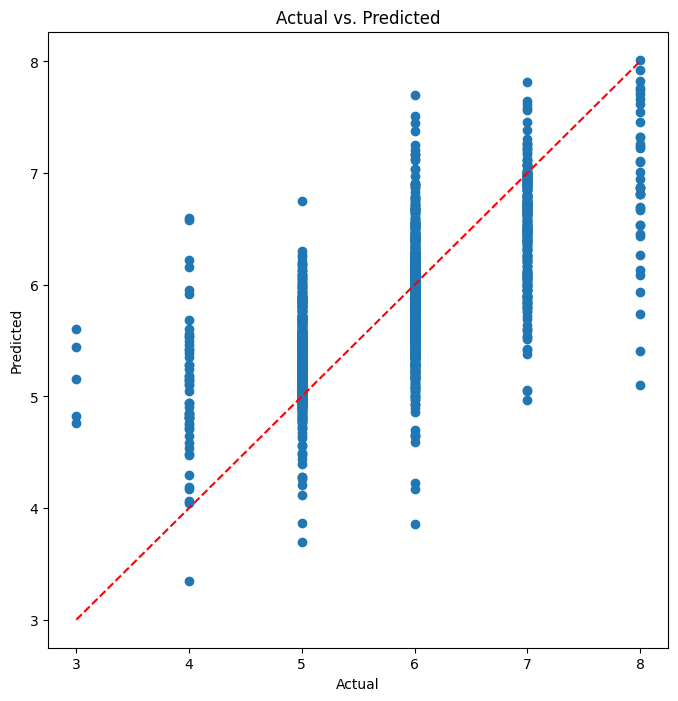

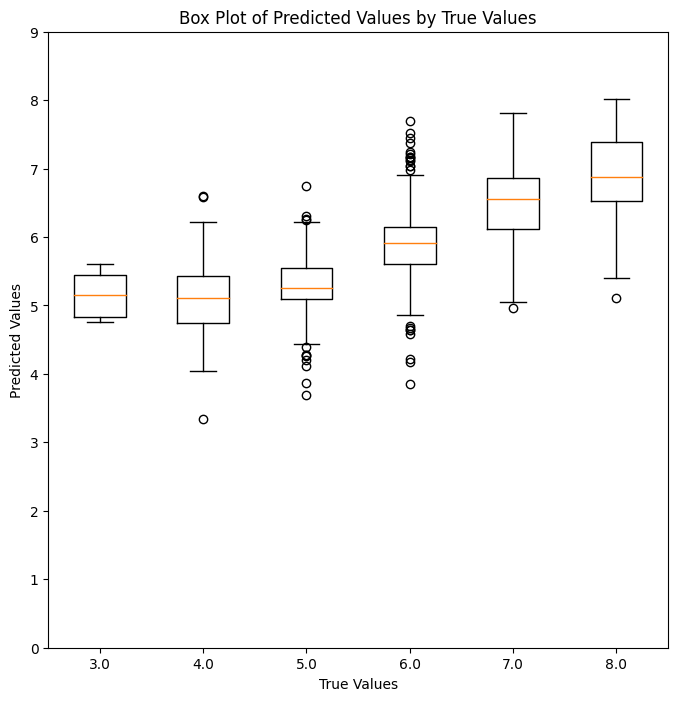

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
regress(model, input, output, oversampling, stratification)

### Support Vector Regression

In [ ]:
'''from sklearn.svm import SVR

model = SVR(kernel='linear')
regress(model, input, output, oversampling)

#ATTENTION: Needs a lot of time!!!'''

"from sklearn.svm import SVR\n\nmodel = SVR(kernel='linear')\nregress(model, input, output, oversampling)\n\n#ATTENTION: Needs a lot of time!!!"

### K-Nearest Neighbors Regression

KNeighborsRegressor
------------------------------
Overall Accuracy: 0.4947692307692308
Weighted Precision: 0.4888226110593227
Weighted Recall: 0.4947692307692308
Weighted F1 Score: 0.47295801280081723
------------------------------
Adjacented Accuracy (Range: 1): 0.9433846153846154
Adjacented Precision (Range 1): 0.9439655172413793
Adjacented Recall (Range 1): 0.9967490247074122
Adjacented F1 Score (Range 1): 0.9696394686907022
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.5000
  Recall: 0.0377
  F1 Score: 0.0702
  Support: 53
Class 5:
  Precision: 0.5129
  Recall: 0.4552
  F1 Score: 0.4823
  Support: 525
Class 6:
  Precision: 0.5026
  Recall: 0.6608
  F1 Score: 0.5709
  Support: 734
Class 7:
  Precision: 0.4096
  Recall: 0.2862
  F1 Score: 0.3370
  Support: 269
Class 8:
  Precision: 0.5000
  Recall: 0.0256
  F1 Score: 0.0488
  Support: 39
Class macro avg:
  Precision: 0.4042
 

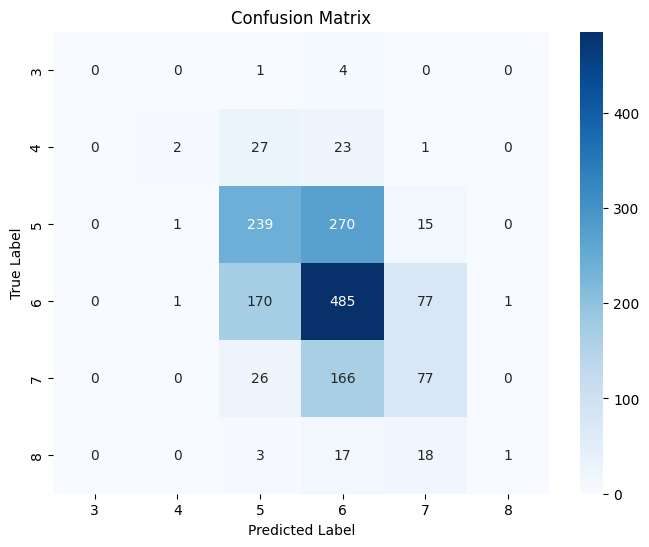

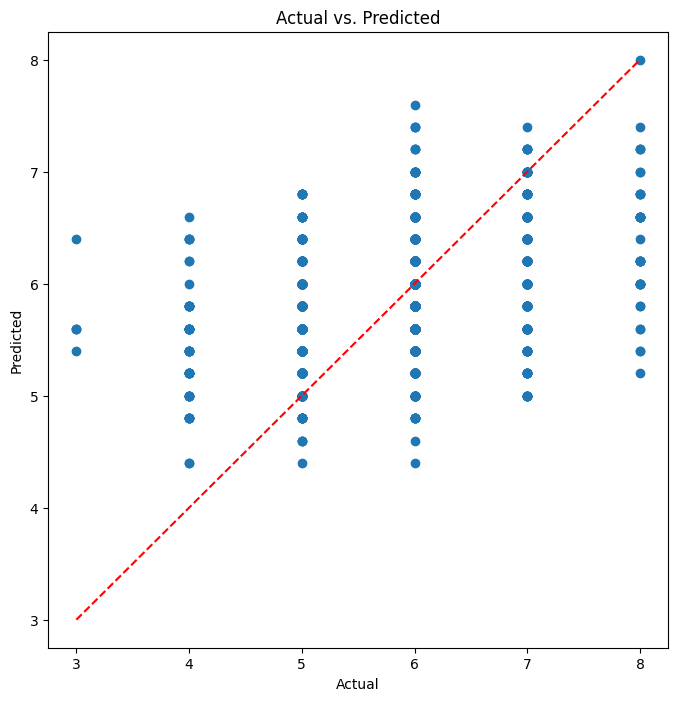

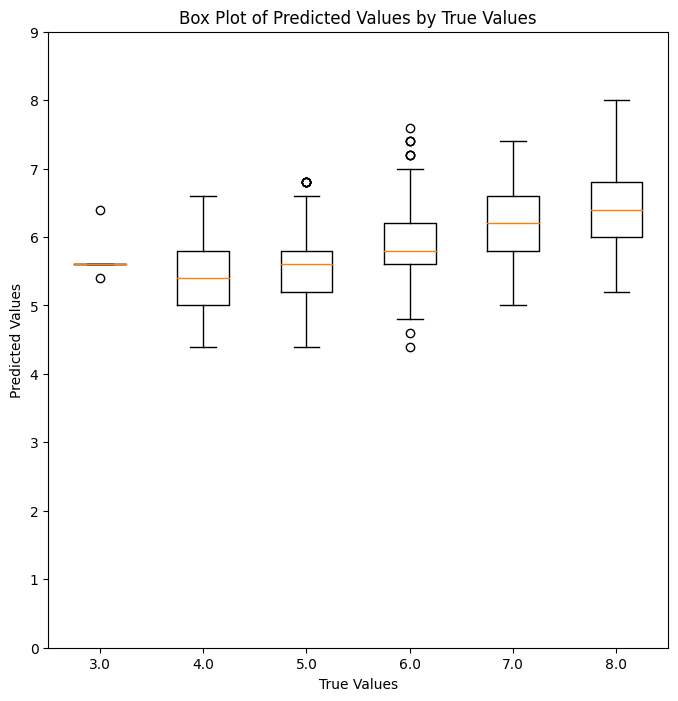

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
regress(model, input, output, oversampling, stratification)

### Neural Network - Multi-layer Perceptron Regression

MLPRegressor
------------------------------
Overall Accuracy: 0.5396923076923077
Weighted Precision: 0.5178969468642458
Weighted Recall: 0.5396923076923077
Weighted F1 Score: 0.5141933262191596
------------------------------
Adjacented Accuracy (Range: 1): 0.9667692307692307
Adjacented Precision (Range 1): 0.9667692307692307
Adjacented Recall (Range 1): 0.9855708908406524
Adjacented F1 Score (Range 1): 0.9760795278036657
------------------------------
Per-Class Evaluation:
Class 3:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 5
Class 4:
  Precision: 0.3333
  Recall: 0.0189
  F1 Score: 0.0357
  Support: 53
Class 5:
  Precision: 0.6224
  Recall: 0.5181
  F1 Score: 0.5655
  Support: 525
Class 6:
  Precision: 0.5295
  Recall: 0.7207
  F1 Score: 0.6105
  Support: 734
Class 7:
  Precision: 0.4032
  Recall: 0.2788
  F1 Score: 0.3297
  Support: 269
Class 8:
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  Support: 39
Class macro avg:
  Precision: 0.3148
  Recall:

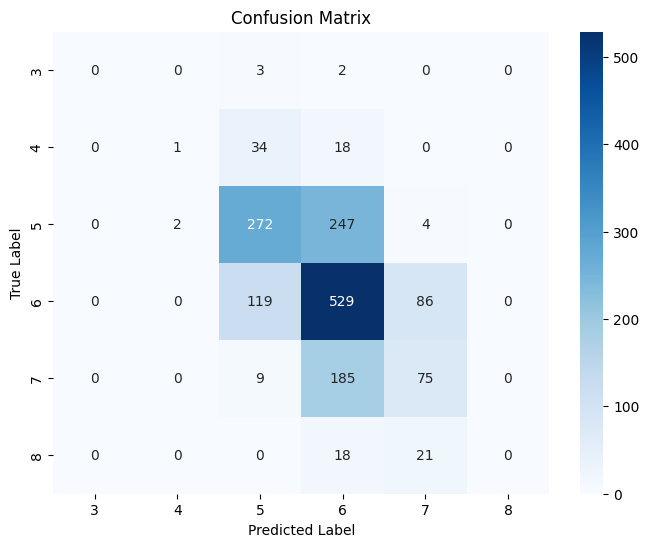

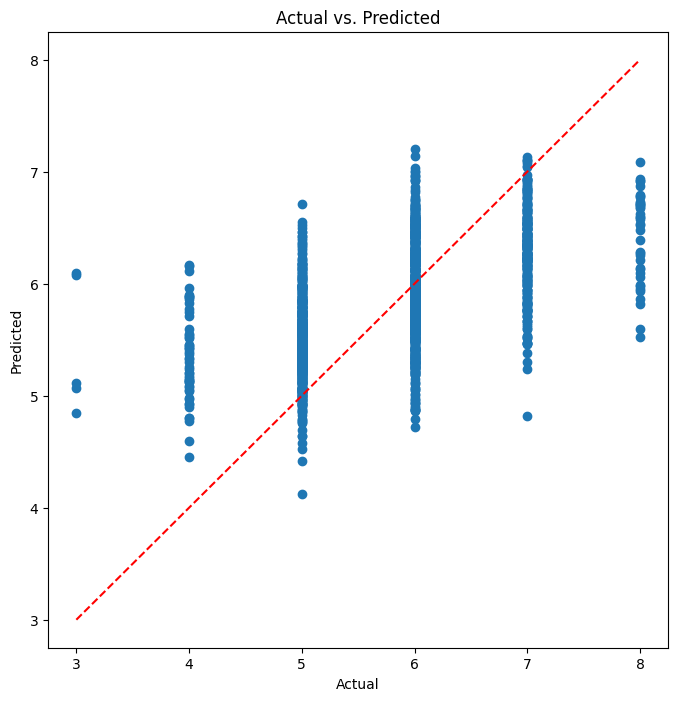

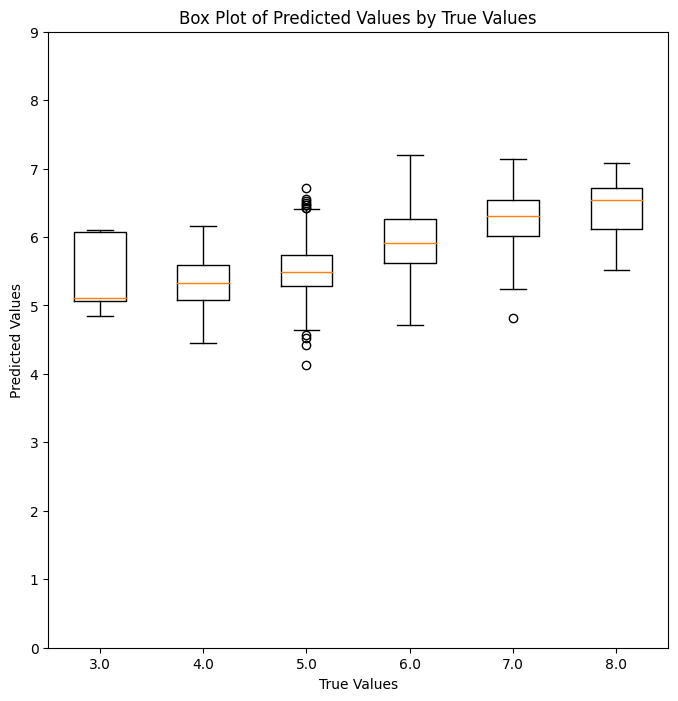

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
regress(model, input, output, oversampling, stratification)

In [ ]:
output.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64